# What is Feature Scaling

***Feature Scaling is a technique to stanardize the independent features present in the data in a fixes range***

# Why Do we need Feature Scaling

# Types Of Feature Scaling?
 
### 1.Standardization
### 2.Normalization

# 1.Standardization
#### Also called as Z-score Normalization
#### Formula: Xi'    = xi-x_mean/std
#### mean always 0 and std always 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('datasets/Social_Network_Ads.csv')

In [3]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [4]:
x = df.drop(['User ID','Purchased','Gender'],axis=1)
y = df['Purchased']

In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [6]:
x_train.shape,x_test.shape

((280, 2), (120, 2))

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

print(x_train['Age'].mean())
print(x_train['EstimatedSalary'].mean())

37.582142857142856
67400.0


In [9]:
print(x_train['Age'].std())
print(x_train['EstimatedSalary'].std())

10.55181968276143
33312.100764552066


In [10]:
print(x_test['Age'].std())
print(x_test['EstimatedSalary'].std())

10.362069242752465
35403.056373146996


In [11]:
print(x_test['Age'].mean())
print(x_test['EstimatedSalary'].mean())

37.825
75208.33333333333


In [12]:
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [13]:
x_train_scale = pd.DataFrame(x_train_scale,columns=x_train.columns)

In [14]:
x_train_scale

,Age,EstimatedSalary
0,1.368832,2.484019
1,1.463772,1.100667
2,-1.099609,-1.575818
3,-0.909729,0.348845
4,2.033413,0.619501
...,...,...
275,-0.245149,0.108262
276,-1.289490,-1.455527
277,-0.719849,1.461542
278,1.463772,0.439064


In [15]:
x_test_scale = pd.DataFrame(x_test_scale,columns=x_train.columns)

In [16]:
x_test_scale

,Age,EstimatedSalary
0,-0.529969,1.491614
1,-1.194550,-1.365308
2,-1.099609,0.378918
3,-0.245149,-0.192466
4,2.128353,-1.004434
...,...,...
115,-0.150209,0.950303
116,1.938473,-0.884142
117,-0.719849,-1.575818
118,0.134611,0.108262


In [17]:
print(x_test_scale['Age'].mean())
print(x_test_scale['EstimatedSalary'].mean())

0.023056874428722587
0.23481900169070488


In [18]:
print(x_test_scale['Age'].std())
print(x_test_scale['EstimatedSalary'].std())

0.9837755914488786
1.0646715501825559


In [19]:
x_train.describe()

,Age,EstimatedSalary
count,280.000000,280.000000
mean,37.582143,67400.000000
std,10.551820,33312.100765
min,18.000000,15000.000000
25%,29.750000,42000.000000
50%,37.000000,68500.000000
75%,46.000000,86000.000000
max,60.000000,150000.000000


In [20]:
np.round(x_train_scale.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.8,0.6
max,2.1,2.5


In [21]:
np.round(x_test_scale.describe(),1)

,Age,EstimatedSalary
count,120.0,120.0
mean,0.0,0.2
std,1.0,1.1
min,-1.9,-1.6
25%,-0.7,-0.5
50%,-0.1,0.1
75%,0.7,0.9
max,2.1,2.4


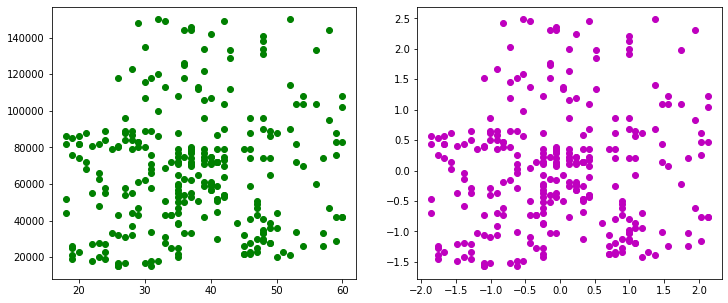

In [22]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'],color='g')
ax2.scatter(x_train_scale['Age'],x_train_scale['EstimatedSalary'],color='m')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

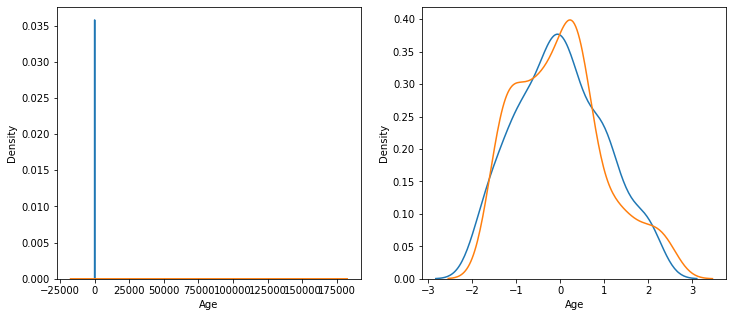

In [23]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

sns.kdeplot(x_train_scale['Age'],ax=ax2)
sns.kdeplot(x_train_scale['EstimatedSalary'],ax=ax2)

<AxesSubplot:xlabel='Age', ylabel='Density'>

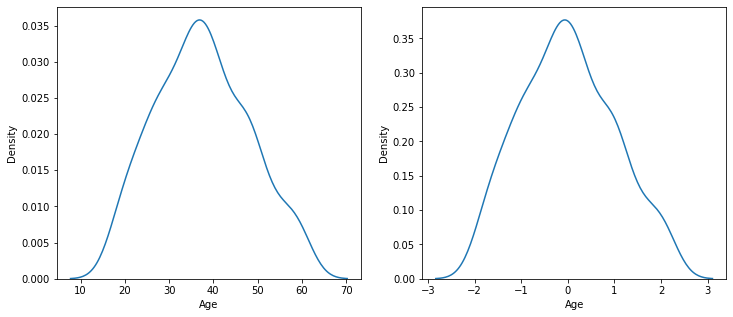

In [24]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['Age'],ax=ax1)

sns.kdeplot(x_train_scale['Age'],ax=ax2)

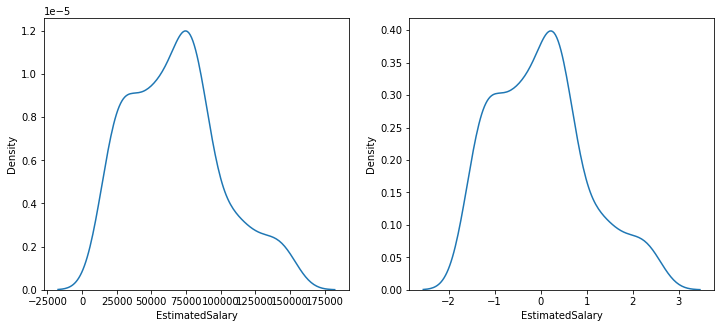

In [25]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

sns.kdeplot(x_train_scale['EstimatedSalary'],ax=ax2)
plt.show()

# Why Scaling is imprtant

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr1 = LogisticRegression()
lr1.fit(x_train,y_train)

lr1_pred = lr1.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lr1_pred)

0.6333333333333333

In [29]:
lr2 = LogisticRegression()
lr2.fit(x_train_scale,y_train)

lr2_pred = lr2.predict(x_test_scale)

In [30]:
accuracy_score(y_test,lr2_pred)

0.875

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt1 = DecisionTreeClassifier()
dt1.fit(x_train,y_train)

dt1_pred = dt1.predict(x_test)

In [33]:
accuracy_score(y_test,dt1_pred)

0.8333333333333334

In [34]:
dt2 = DecisionTreeClassifier()
dt2.fit(x_train_scale,y_train)

dt2_pred = dt2.predict(x_test_scale)

In [35]:
accuracy_score(y_test,dt2_pred)

0.875

# Effect of Outlier

In [36]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

/tmp/ipykernel_5590/2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


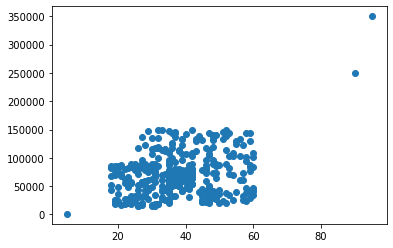

In [37]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Purchased','Gender'], axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

x_train.shape, x_test.shape

((282, 3), (121, 3))

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

<AxesSubplot:xlabel='Age', ylabel='Density'>

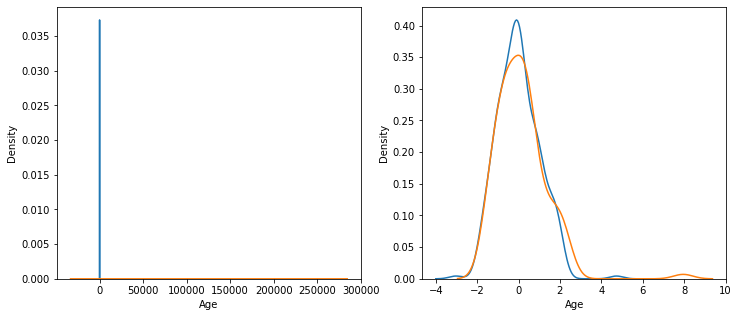

In [41]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_test_scaled['EstimatedSalary'],ax=ax2)

# When to use Standardization?

### 1 . K-Means
### 2. K-means neighbours
### 3. PCA
### 4. GD